In [274]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import json

pd.set_option("display.max_rows", 100)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [275]:
# Loading in the Observational Data & Non-Event Data

fh = '/Users/henrycosentino/Desktop/Python/Projects/Event Drift/master_data.csv'

with open(fh, 'r') as file:
    master_dict = json.load(file)

## Descriptive Statistics for Event Data

In [276]:
event_data = master_dict['event_data']

for horizon in range(10,61, 10):
    horizon = str(horizon)
    horizon_df = pd.DataFrame(event_data[horizon])

    print(f'DESCRIPTIVE STATISTICS FOR {horizon} DAY HORIZON FOR GOOD EVENT')
    goodEvent_horizon_df = horizon_df[horizon_df[f"{horizon}_event_type_(good=1, no-event=NaN)"] == 1]
    print(goodEvent_horizon_df.describe())
    print(f'DESCRIPTIVE STATISTICS FOR {horizon} DAY HORIZON FOR BAD EVENT')
    badEvent_horizon_df = horizon_df[horizon_df[f"{horizon}_event_type_(good=1, no-event=NaN)"] == 0]
    print(badEvent_horizon_df.describe())
    print("\n\n")

DESCRIPTIVE STATISTICS FOR 10 DAY HORIZON FOR GOOD EVENT
       10_stock_return  10_market_return  10_earnDate_dummy  \
count        17.000000         17.000000          17.000000   
mean         -0.024692         -0.009507           0.117647   
std           0.074434          0.028628           0.332106   
min          -0.217131         -0.077424           0.000000   
25%          -0.042505         -0.022813           0.000000   
50%          -0.009807         -0.007684           0.000000   
75%           0.007738          0.009116           0.000000   
max           0.086197          0.033742           1.000000   

       10_event_type_(good=1, no-event=NaN)  
count                                  17.0  
mean                                    1.0  
std                                     0.0  
min                                     1.0  
25%                                     1.0  
50%                                     1.0  
75%                                     1.0  
max    

## Descriptive Statistics for Non-Event Data

In [277]:
nonEvent_data = master_dict['nonEvent_data']

for horizon in range(10,61, 10):
    horizon = str(horizon)
    horizon_df = pd.DataFrame(nonEvent_data[horizon])

    print(f'DESCRIPTIVE STATISTICS FOR {horizon} DAY FOR NON-EVENT')
    print(horizon_df.describe())
    print("\n\n")

DESCRIPTIVE STATISTICS FOR 10 DAY FOR NON-EVENT
       10_stock_return  10_market_return  10_earnDate_dummy  \
count        40.000000         40.000000          40.000000   
mean          0.017718         -0.002456           0.125000   
std           0.065581          0.040004           0.334932   
min          -0.109591         -0.109895           0.000000   
25%          -0.031620         -0.019629           0.000000   
50%           0.032106          0.003245           0.000000   
75%           0.048433          0.024828           0.000000   
max           0.236362          0.086383           1.000000   

       10_event_type_(good=1, no-event=NaN)  
count                                   0.0  
mean                                    NaN  
std                                     NaN  
min                                     NaN  
25%                                     NaN  
50%                                     NaN  
75%                                     NaN  
max             

## Master Data frame

In [278]:
# Creating a master frame dictionary of event and nono-event data (each key is a horizon and each value is a data frame)

master_df_dict = {}
for i in range(1,61):
    i = str(i)

    nonEvent_horizon_df = pd.DataFrame(nonEvent_data[i])
    event_horizon_df = pd.DataFrame(event_data[i])

    horizon_df = pd.concat([nonEvent_horizon_df, event_horizon_df]).reset_index(drop=True)
    
    master_df_dict[int(i)] = horizon_df # Change the keys back to int's beecause str's are annoying :/

In [279]:
# An example representation of a five day horizon data frame for all good events, all bad events, and all non-events

master_df_dict[5].head()

,5_stock_return,5_market_return,5_earnDate_dummy,"5_event_type_(good=1, no-event=NaN)"
0,0.032700,-0.032220,0,NaN
1,0.029240,0.018683,0,NaN
2,0.015133,0.004863,0,NaN
3,0.053659,-0.008066,1,NaN
4,-0.018248,0.024921,0,NaN


## Preliminary Graphical Data Analysis

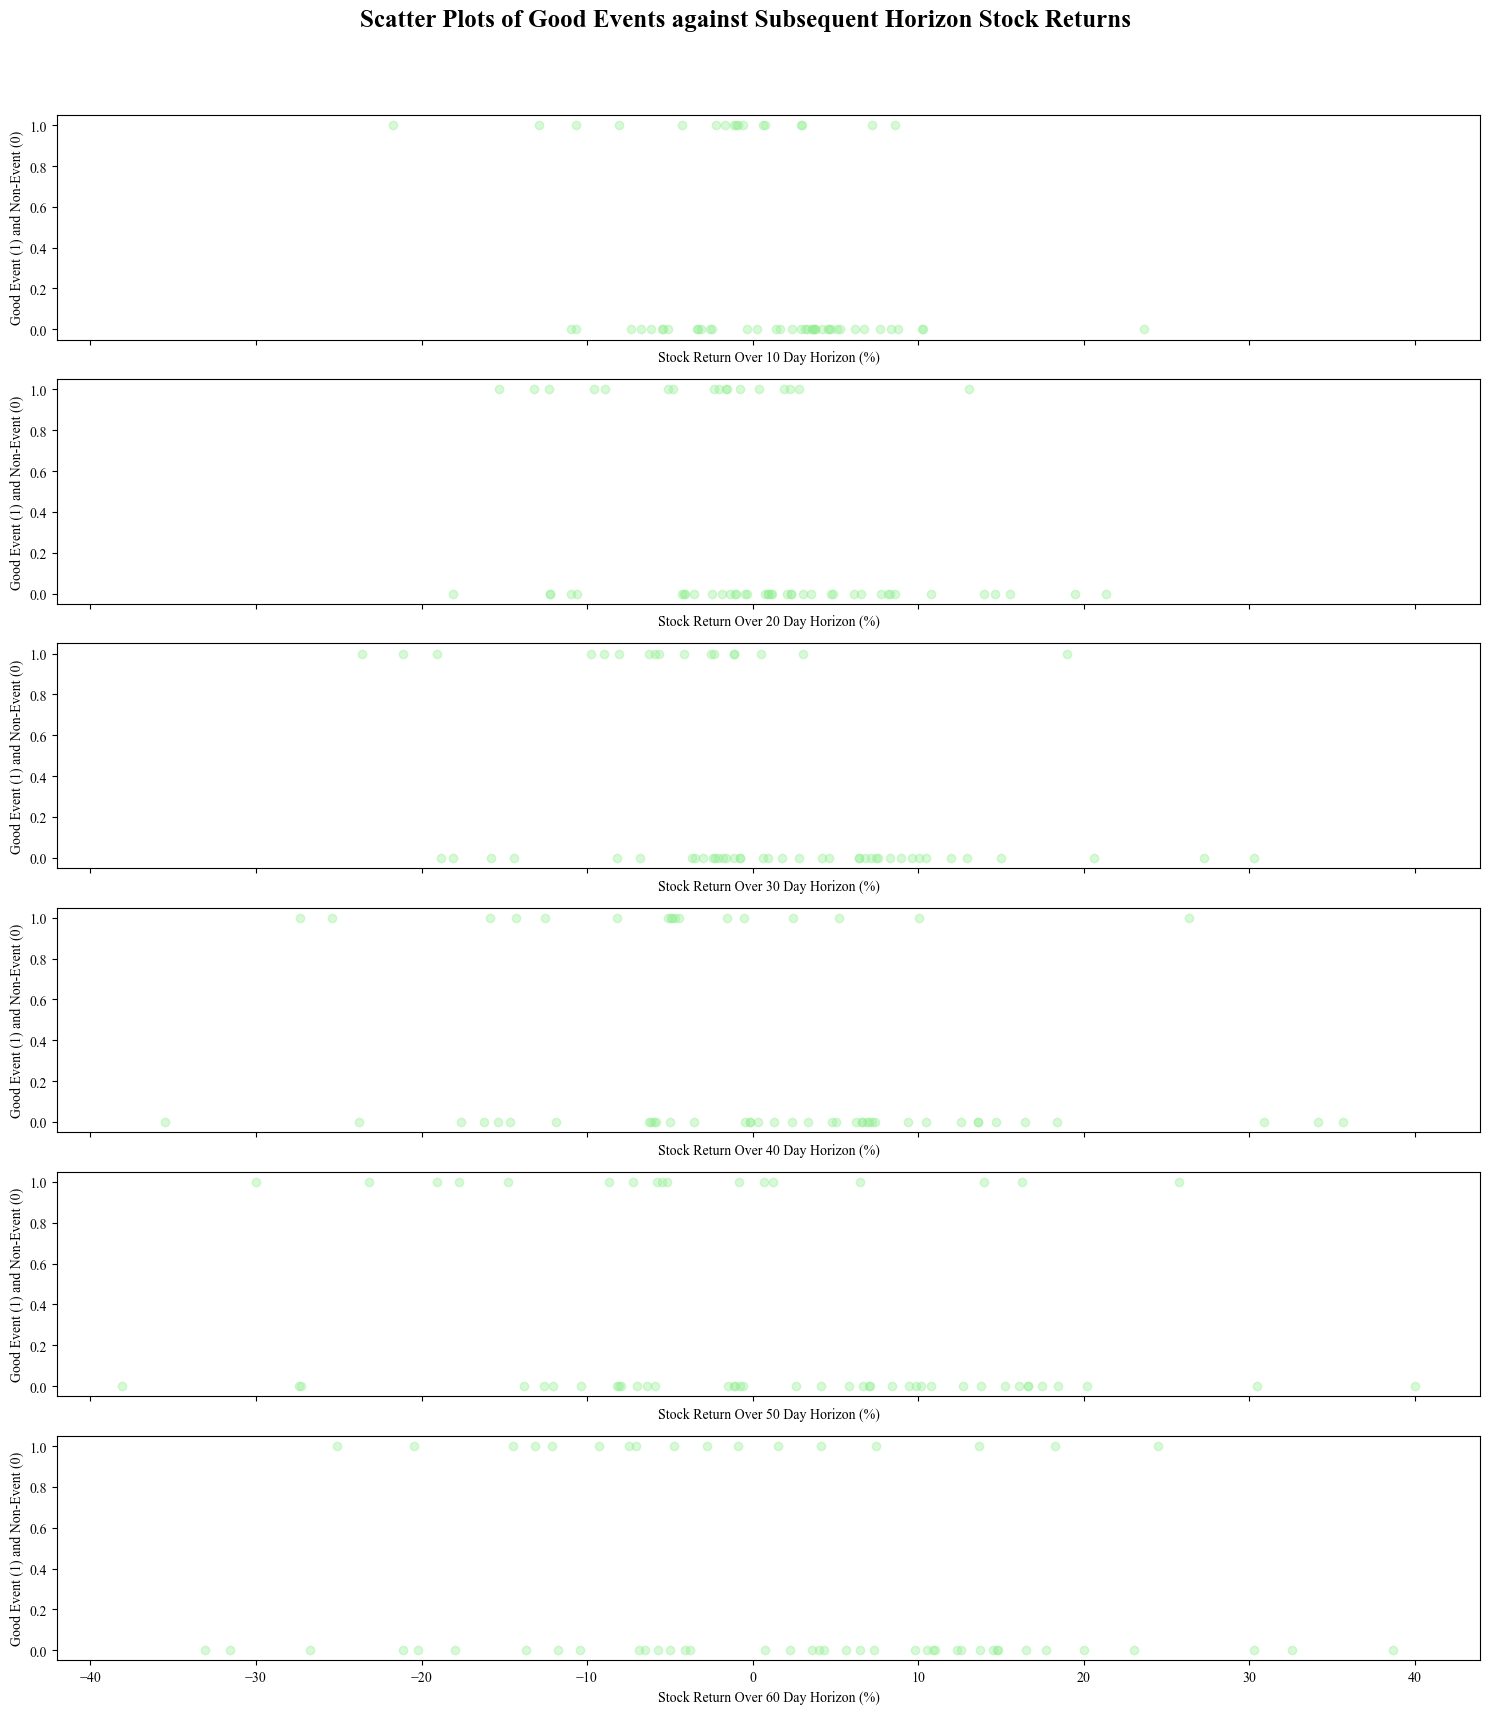

In [280]:
# Scatter plot analysis for good events & non-events

# plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 18), sharex=True)
plt.suptitle("Scatter Plots of Good Events against Subsequent Horizon Stock Returns", 
          fontweight='bold',
          fontsize=18
)

for i, horizon in enumerate(range(10, 61, 10)):
    ax = axes[i]

    df = master_df_dict[horizon]

    eventCol_name = f"{str(horizon)}_event_type_(good=1, no-event=NaN)"
    stockCol_name = f"{str(horizon)}_stock_return"

    df = df[(df[eventCol_name] != 0)].copy()
    df = df.fillna(0)

    y_values = pd.Series(df[eventCol_name])
    x_values = pd.Series(df[stockCol_name]) * 100

    ax.scatter(x_values, y_values, alpha=0.35, color='lightgreen')
    ax.set_xlabel(f"Stock Return Over {str(horizon)} Day Horizon (%)")
    ax.set_ylabel("Good Event (1) and Non-Event (0)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('/Users/henrycosentino/Desktop/ScatterPlotGoodEvent.png', transparent=True)
plt.show()

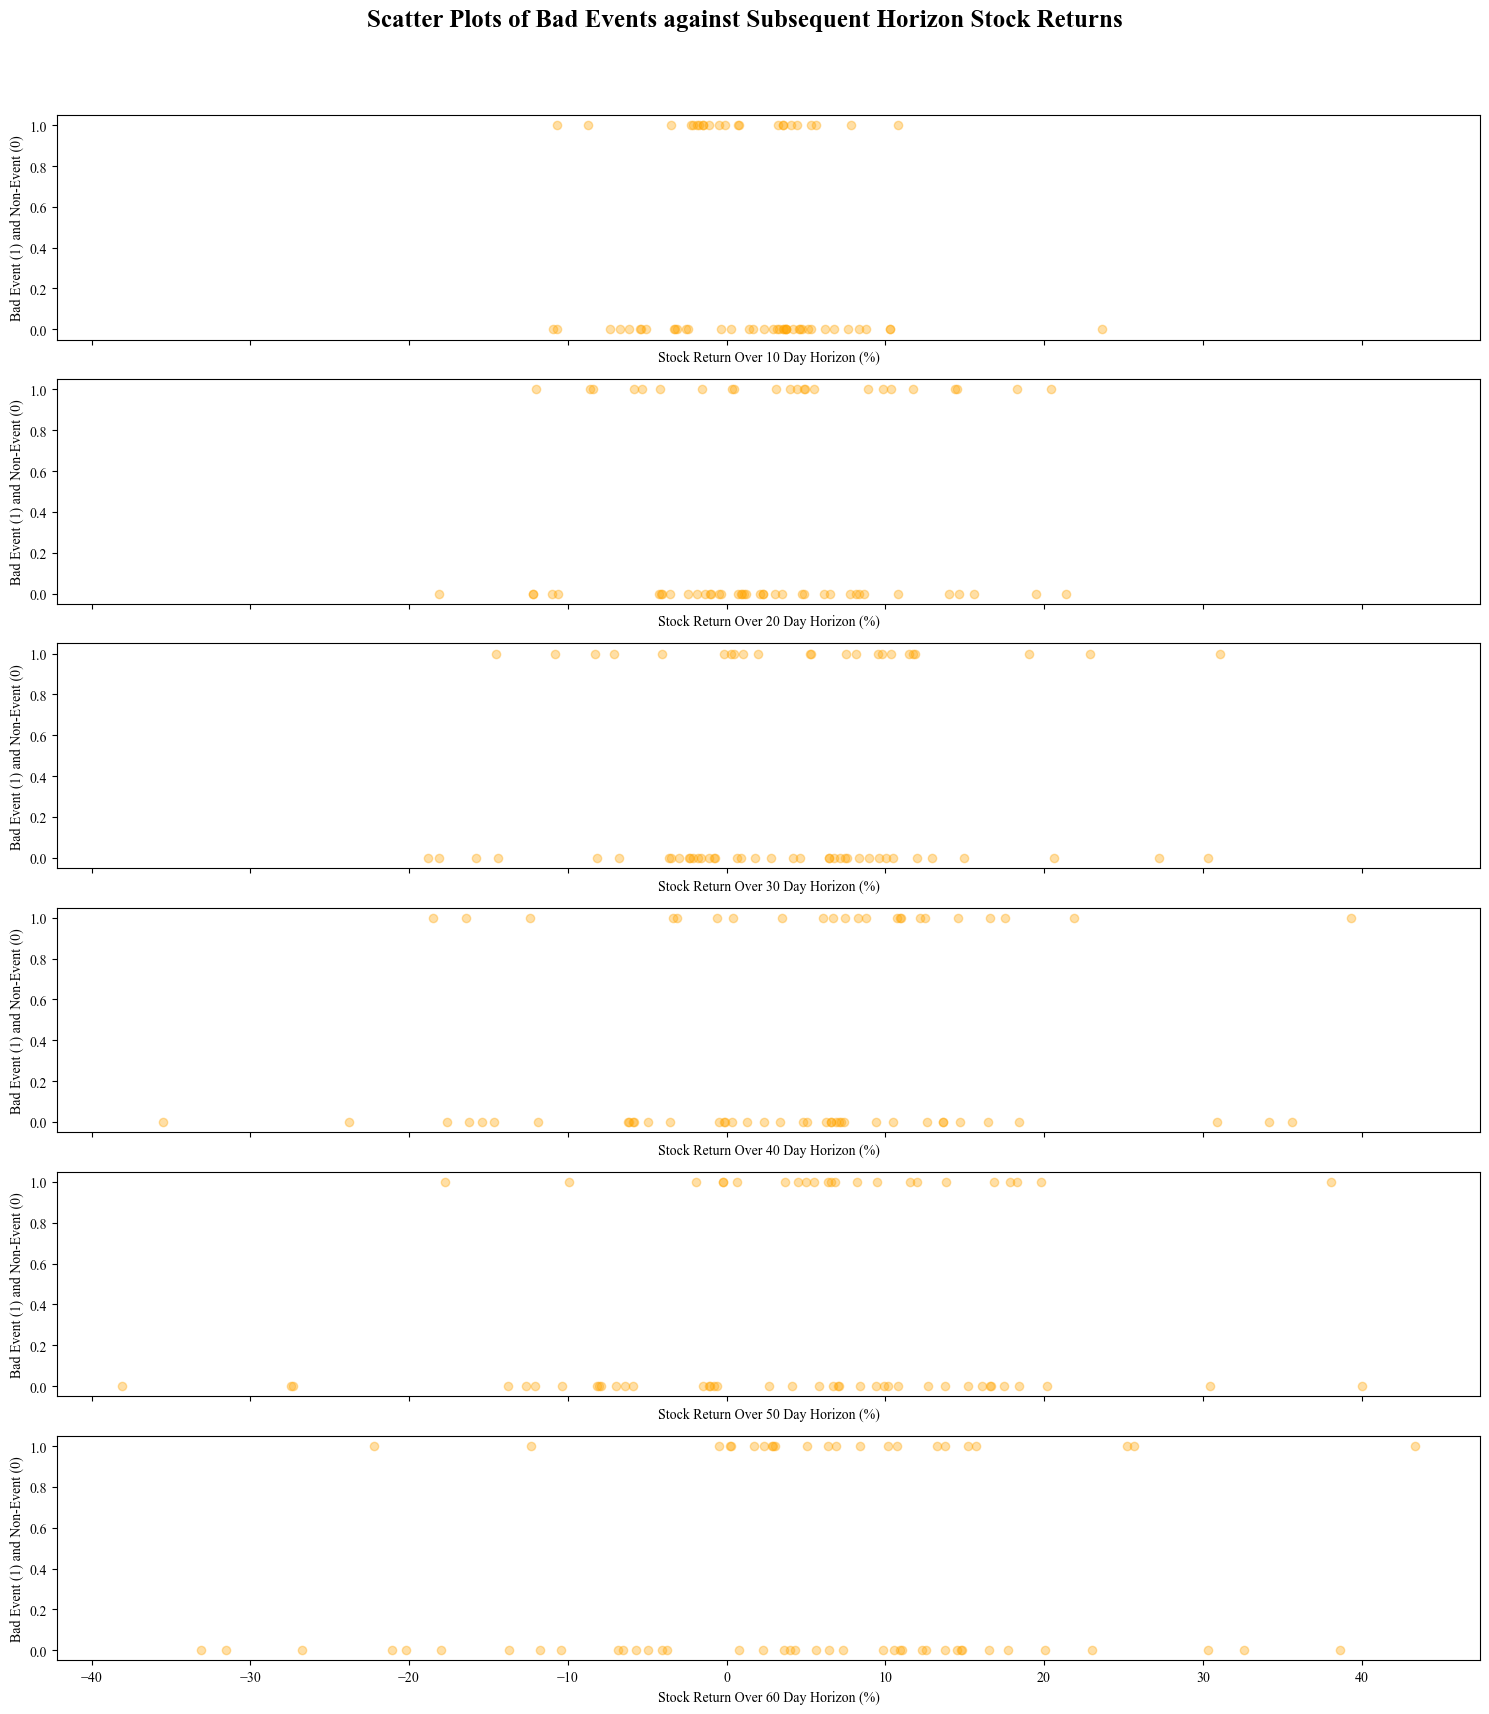

In [281]:
# Scatter plot analysis for bad events & non-events

# plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 18), sharex=True)
plt.suptitle("Scatter Plots of Bad Events against Subsequent Horizon Stock Returns", 
          fontweight='bold',
          fontsize=18
)

for i, horizon in enumerate(range(10, 61, 10)):
    ax = axes[i]

    df = master_df_dict[horizon]

    eventCol_name = f"{str(horizon)}_event_type_(good=1, no-event=NaN)"
    stockCol_name = f"{str(horizon)}_stock_return"

    df = df[(df[eventCol_name] != 1)].copy()
    df[eventCol_name] += 1
    df = df.fillna(0)

    y_values = pd.Series(df[eventCol_name])
    x_values = pd.Series(df[stockCol_name]) * 100

    ax.scatter(x_values, y_values, alpha=0.35, color='orange')
    ax.set_xlabel(f"Stock Return Over {str(horizon)} Day Horizon (%)")
    ax.set_ylabel("Bad Event (1) and Non-Event (0)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('/Users/henrycosentino/Desktop/ScatterPlotBadEvent.png', transparent=True)
plt.show()

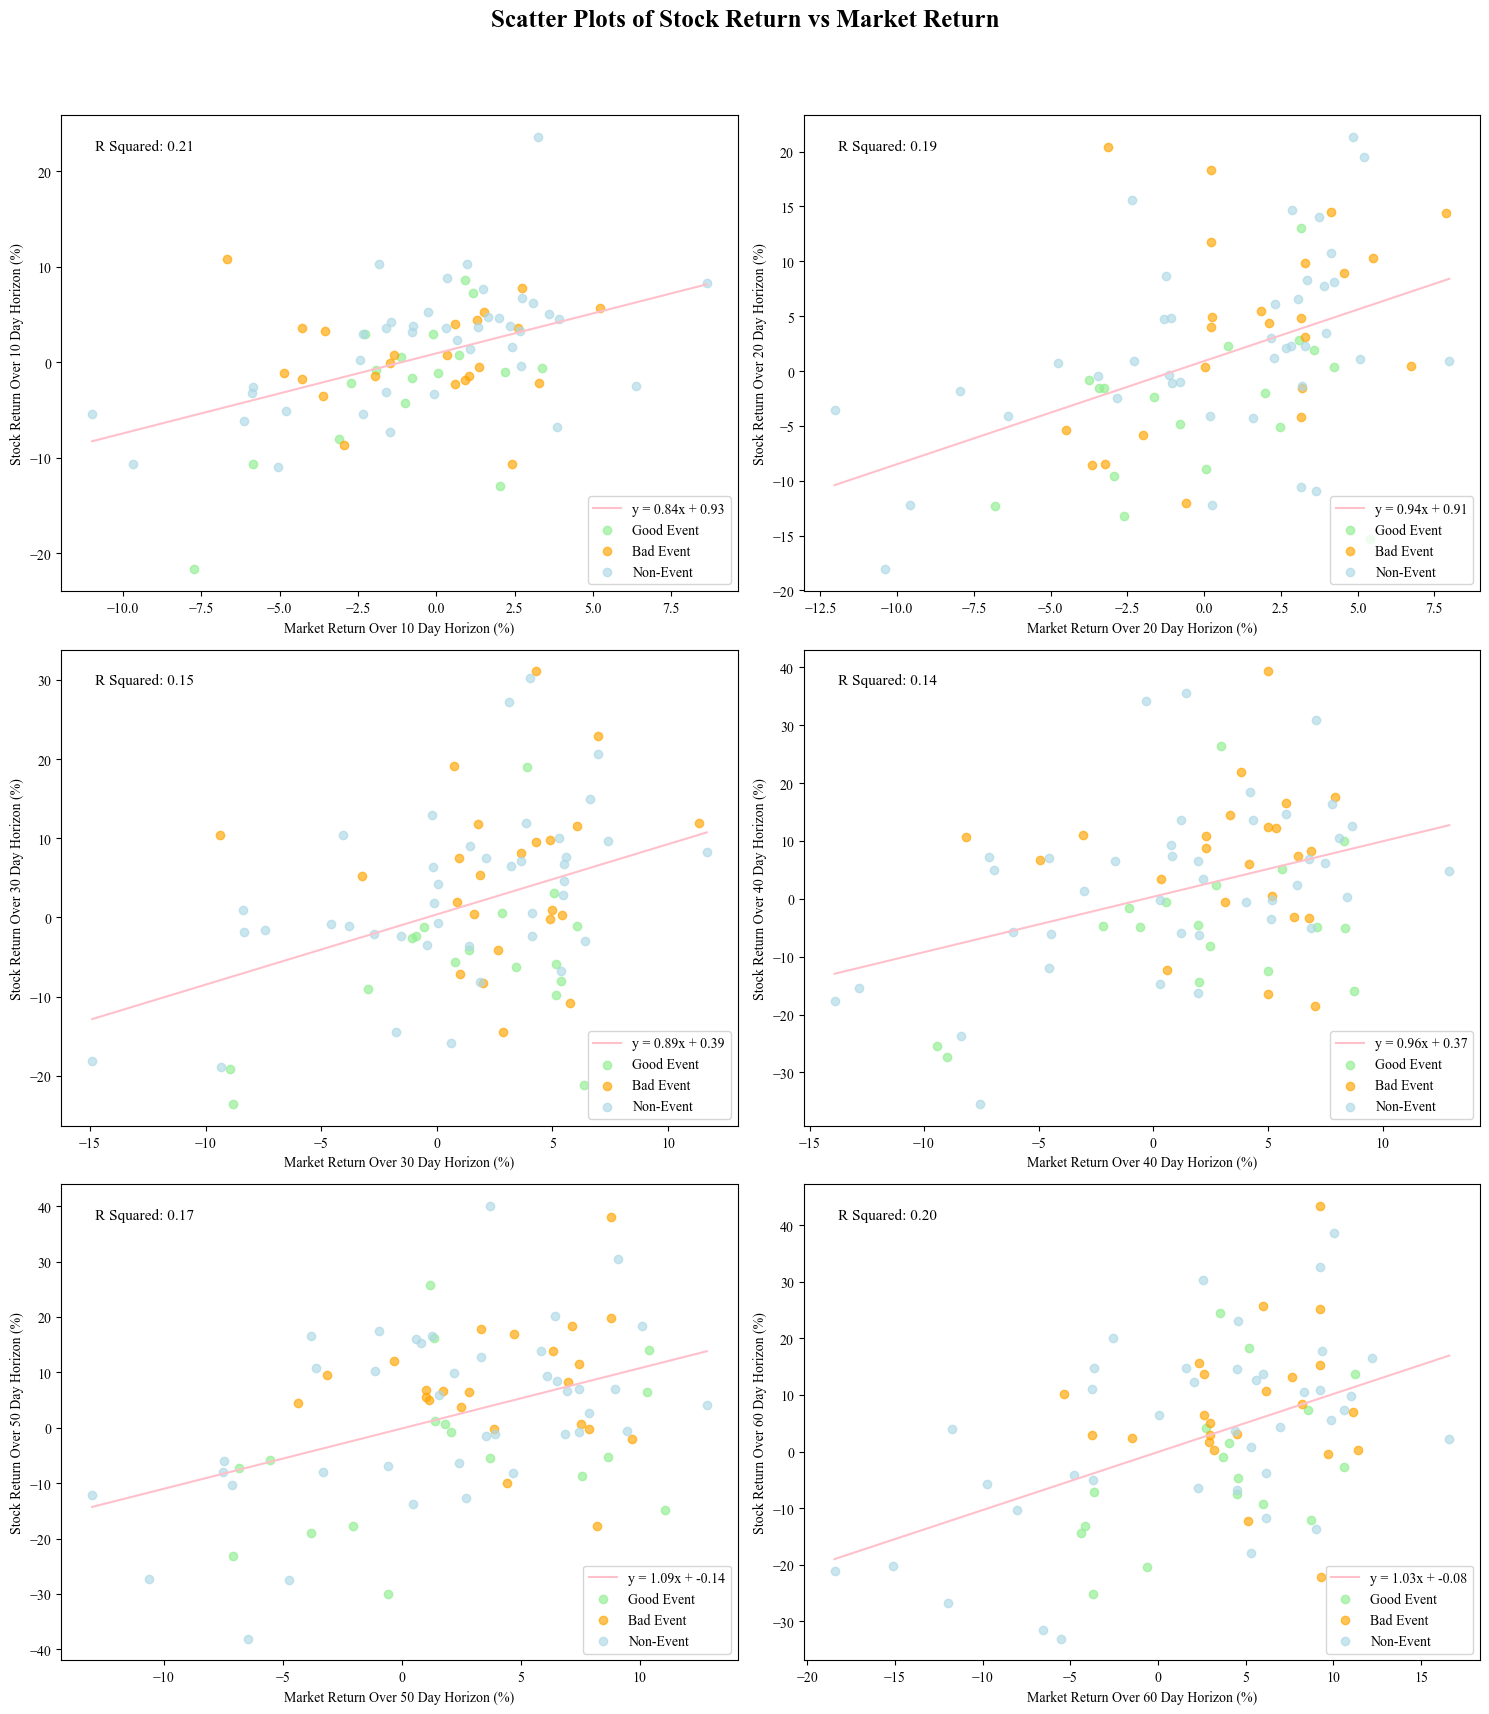

In [282]:
# Scatter plot analysis for omitted variable bias (includes all event types and nonevents)

"""
The market return is the potential omitted variable we want to control for...
"""

from sklearn.linear_model import LinearRegression

# plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
plt.suptitle("Scatter Plots of Stock Return vs Market Return",
           fontweight='bold',
          fontsize=18)

for i, horizon in enumerate(range(10, 61, 10)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    df = master_df_dict[horizon]
    marketColName = f"{str(horizon)}_market_return"
    stockColName = f"{str(horizon)}_stock_return"
    eventTypeColName = f"{str(horizon)}_event_type_(good=1, no-event=NaN)"
    
    # Linear Regression
    x_values = pd.Series(df[marketColName]) * 100
    y_values = pd.Series(df[stockColName]) * 100
    
    x_max = max(x_values)
    x_min = min(x_values)
    x_fake_ls = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_values.values.reshape(-1, 1), y_values)
    
    beta1 = lin_reg.coef_
    beta0 = lin_reg.intercept_
    score = lin_reg.score(x_values.values.reshape(-1, 1), y_values)
    
    y_pred_ls = lin_reg.predict(x_fake_ls)
    
    ax.plot(x_fake_ls, y_pred_ls, color='pink', label=f"y = {beta1[0]:.2f}x + {beta0:.2f}")

    # Scatter Plot for good events, bad events, and non-events
    df_good = df[df[eventTypeColName] == 1] * 100
    x_good, y_good = df_good[marketColName], df_good[stockColName]
    ax.scatter(x_good, y_good, alpha=0.65, color ='lightgreen', label='Good Event')

    df_bad = df[df[eventTypeColName] == 0] * 100
    x_bad, y_bad = df_bad[marketColName], df_bad[stockColName]
    ax.scatter(x_bad, y_bad, alpha=0.65, color ='orange', label='Bad Event')

    df_nonEvent = df[(df[eventTypeColName] != 0) & (df[eventTypeColName] != 1)] * 100
    x_non, y_non = df_nonEvent[marketColName], df_nonEvent[stockColName]
    ax.scatter(x_non, y_non, alpha=0.65, color='lightblue', label='Non-Event')
    
    ax.set_xlabel(f"Market Return Over {str(horizon)} Day Horizon (%)")
    ax.set_ylabel(f"Stock Return Over {str(horizon)} Day Horizon (%)")
    ax.legend(loc='lower right')

    ax.text(0.05, 0.95, 
            f'R Squared: {score:.2f}', 
            transform=ax.transAxes, 
            verticalalignment='top', 
            fontsize=11
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('/Users/henrycosentino/Desktop/ScatterPlot.png', transparent=True)
plt.show()

## Regression Analysis

In [283]:
"""
    Dependent Variable (Y):
        Y: Horizon stock return

    Independent Variables (X):
        x1: Unexpected news event (yes=1, no =0) dummy variable
        x2: Earnings announcement in return period (yes=1, no =0) dummy variable
        x3: Horizon S&P return
"""

good_stats_dict = {}
bad_stats_dict = {}

for horizon in range(1, 61):
    df = master_df_dict[horizon]
    
    earnColName = f"{str(horizon)}_earnDate_dummy"
    marketColName = f"{str(horizon)}_market_return"
    stockColName = f"{str(horizon)}_stock_return"
    eventTypeColName = f"{str(horizon)}_event_type_(good=1, no-event=NaN)"

    # Good news events regression
    good_df = df[df[eventTypeColName] != 0]
    good_df = good_df.copy()
    x1_good = good_df[eventTypeColName].fillna(0)
    x2_good = good_df[earnColName]
    x3_good = good_df[marketColName]
    y_good = good_df[stockColName]
    X_good = sm.add_constant(pd.DataFrame({
        'event_dummy': x1_good,
        'earn_dummy': x2_good,
        'market_return': x3_good
    }))
    
    good_model = sm.OLS(y_good, X_good).fit()

    good_robust_results = good_model.get_robustcov_results(cov_type='HC2')
    
    good_stats_dict[horizon] = {
        'coefficients': good_model.params,
        'pvalues': good_model.pvalues,
        'rsquared': good_model.rsquared,
        'rsquared_adj': good_model.rsquared_adj,
        'fvalue': good_model.fvalue,
        'f_pvalue': good_model.f_pvalue,
        'nobs': good_model.nobs,
        'tvalues': good_model.tvalues,
        'std_errors': good_model.bse,
        'conf_int': good_model.conf_int(),
        'residuals': good_model.resid,
        'y_pred': good_model.fittedvalues,
        'robust_se': good_model.HC2_se, # MacKinnon and White’s (1985) heteroskedasticity robust standard errors
        'robust_pVal': good_robust_results.pvalues
    }
    
    # Bad news events regression
    bad_df = df[df[eventTypeColName] != 1]
    bad_df = bad_df.copy()
    bad_df[eventTypeColName] = bad_df[eventTypeColName].apply(lambda x: 1 if x == 0 else 0)
    x1_bad = bad_df[eventTypeColName].fillna(0)
    x2_bad = bad_df[earnColName]
    x3_bad = bad_df[marketColName]
    y_bad = bad_df[stockColName]
    X_bad = sm.add_constant(pd.DataFrame({
        'event_dummy': x1_bad,
        'earn_dummy': x2_bad,
        'market_return': x3_bad
    }))
    
    bad_model = sm.OLS(y_bad, X_bad).fit()

    bad_robust_results = bad_model.get_robustcov_results(cov_type='HC2')
    
    bad_stats_dict[horizon] = {
        'coefficients': bad_model.params,
        'pvalues': bad_model.pvalues,
        'rsquared': bad_model.rsquared,
        'rsquared_adj': bad_model.rsquared_adj,
        'fvalue': bad_model.fvalue,
        'f_pvalue': bad_model.f_pvalue,
        'nobs': bad_model.nobs,
        'tvalues': bad_model.tvalues,
        'std_errors': bad_model.bse,
        'conf_int': bad_model.conf_int(),
        'residuals': bad_model.resid,
        'y_pred': bad_model.fittedvalues,
        'robust_se': good_model.HC2_se, # MacKinnon and White’s (1985) heteroskedasticity robust standard errors
        'robust_pVal': bad_robust_results.pvalues
    }

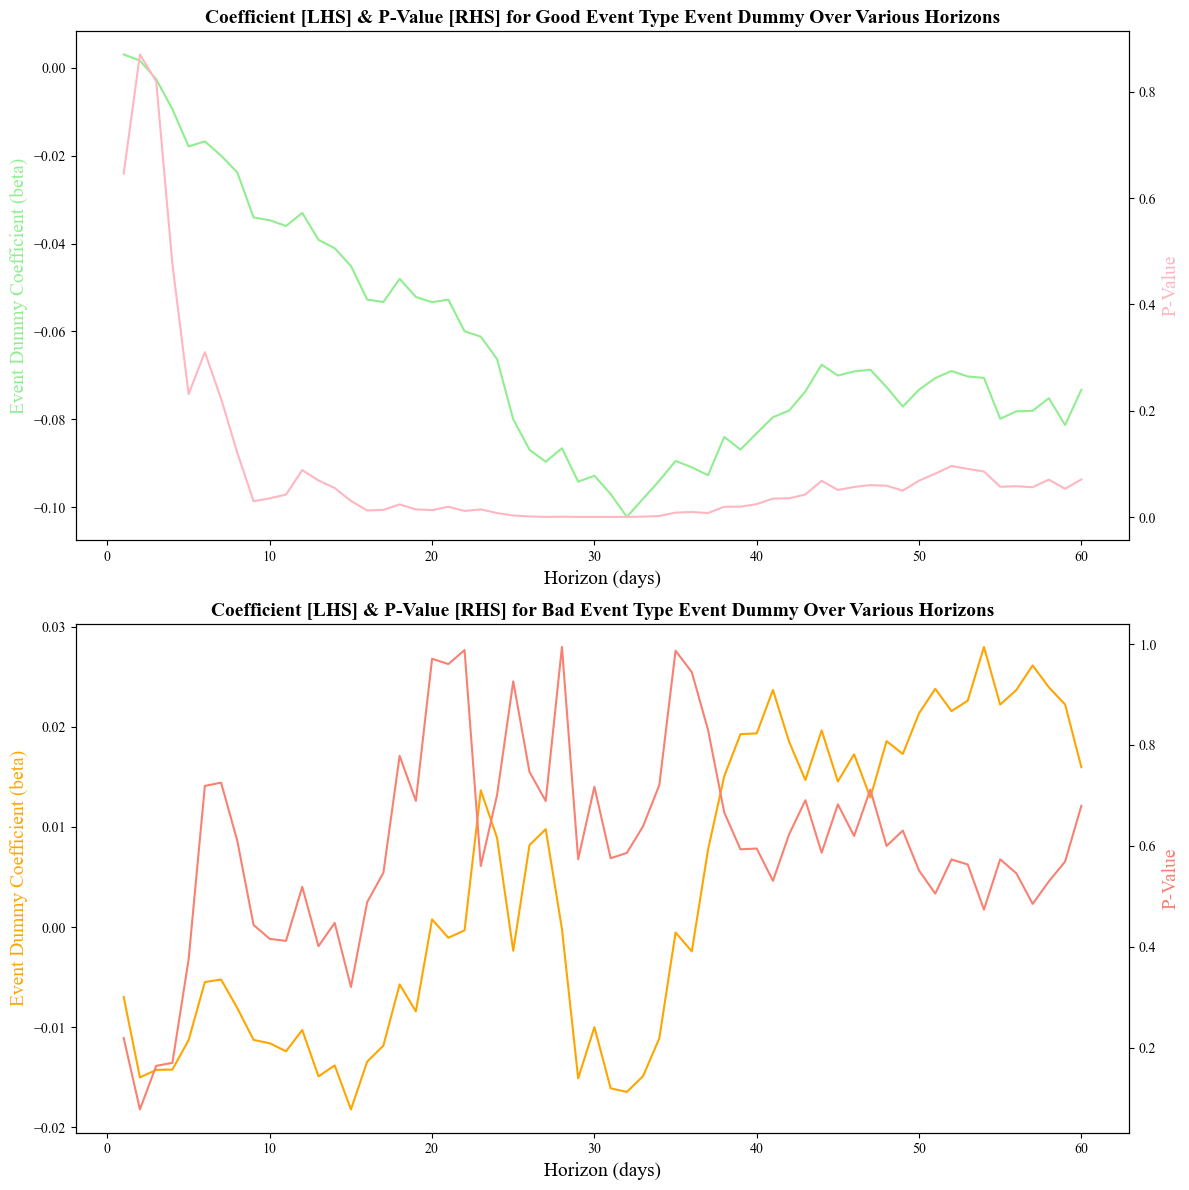

In [284]:
# Graphing 'event_dummy' variable coefficient

horizons = list(range(1, 61))

goodEarnDummyCoef_ls = []
goodEarnDummyPValue_ls = []

badEarnDummyCoef_ls = []
badEarnDummyPValue_ls = []

for horizon in horizons:
    goodEarnDummyCoef_ls.append(good_stats_dict[horizon]['coefficients'].iloc[1])
    goodEarnDummyPValue_ls.append(good_stats_dict[horizon]['pvalues'].iloc[1])

    badEarnDummyCoef_ls.append(bad_stats_dict[horizon]['coefficients'].iloc[1])
    badEarnDummyPValue_ls.append(bad_stats_dict[horizon]['pvalues'].iloc[1])

# Plotting
# plt.style.use("dark_background")
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12,12))

ax1 = axes[0]
ax2 = axes[1]

# Good Event Type
ax1.plot(horizons, goodEarnDummyCoef_ls, color='lightgreen')
ax1.set_xlabel("Horizon (days)", fontsize=14)
ax1.set_ylabel("Event Dummy Coefficient (beta)", color='lightgreen', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_title("Coefficient [LHS] & P-Value [RHS] for Good Event Type Event Dummy Over Various Horizons", 
              fontweight='bold',
              fontsize=14)
ax1_twin = ax1.twinx()
ax1_twin.plot(horizons, goodEarnDummyPValue_ls, color='lightpink')
ax1_twin.set_ylabel("P-Value", color='lightpink', fontsize=14)

# Bad Event Type
ax2.plot(horizons, badEarnDummyCoef_ls, color='orange')
ax2.set_xlabel("Horizon (days)", fontsize=14)
ax2.set_ylabel("Event Dummy Coefficient (beta)", color='orange', fontsize=14)
ax2.tick_params(axis='y')
ax2.set_title("Coefficient [LHS] & P-Value [RHS] for Bad Event Type Event Dummy Over Various Horizons", 
              fontweight='bold',
              fontsize=14)
ax2_twin = ax2.twinx()
ax2_twin.plot(horizons, badEarnDummyPValue_ls, color='salmon')
ax2_twin.set_ylabel("P-Value", color='salmon', fontsize=14)

plt.tight_layout()
# plt.savefig('/Users/henrycosentino/Desktop/EventCoefficientGraph.png', transparent=True)
plt.show()

In [285]:
# Checking out the 30 Day Horizon Good Event Type Regression with all Independent Variables

print("Regression Statistics for 30 Day Horizon".upper())
print('\n')
print('Betas:\n'.upper(), good_stats_dict[30]['coefficients'])
print('\n')
print('Standard Errors:\n'.upper(), good_stats_dict[30]['std_errors'])
print('\n')
print('Robust Standard Errors:\n'.upper(), good_stats_dict[30]['robust_se'])
print('\n')
print('t-Statistics:\n'.upper(), good_stats_dict[30]['tvalues'])
print('\n')
print('Beta P-Values:\n'.upper(), good_stats_dict[30]['pvalues'])
print('\n')
print('Beta P-Values (robust SE):'.upper())
print('const', round(good_stats_dict[30]['robust_pVal'][0], 6))
print('event_dummy', round(good_stats_dict[30]['robust_pVal'][1], 6))
print('earn_dummy', round(good_stats_dict[30]['robust_pVal'][2], 6))
print('market_return', round(good_stats_dict[30]['robust_pVal'][3], 6))
print('\n')
print('F-Statistics:\n'.upper(), good_stats_dict[30]['fvalue'])
print('\n')
print('F P-Value:\n'.upper(), good_stats_dict[30]['f_pvalue'])
print('\n')
print('R Squared:\n'.upper(), good_stats_dict[30]['rsquared'])
print('\n')
print('R Squared (adj.):\n'.upper(), good_stats_dict[30]['rsquared_adj'])
print('\n')

REGRESSION STATISTICS FOR 30 DAY HORIZON


BETAS:
 const           -0.004719
event_dummy     -0.092836
earn_dummy       0.061764
market_return    1.152553
dtype: float64


STANDARD ERRORS:
 const            0.016924
event_dummy      0.025090
earn_dummy       0.024434
market_return    0.230969
dtype: float64


ROBUST STANDARD ERRORS:
 const            0.015801
event_dummy      0.024108
earn_dummy       0.026716
market_return    0.239387
dtype: float64


T-STATISTICS:
 const           -0.278859
event_dummy     -3.700061
earn_dummy       2.527819
market_return    4.990067
dtype: float64


BETA P-VALUES:
 const            0.781438
event_dummy      0.000514
earn_dummy       0.014494
market_return    0.000007
dtype: float64


BETA P-VALUES (ROBUST SE):
const 0.766347
event_dummy 0.000319
earn_dummy 0.024703
market_return 1.3e-05


F-STATISTICS:
 12.78461684311549


F P-VALUE:
 2.1196899217215742e-06


R SQUARED:
 0.41983835719136653


R SQUARED (ADJ.):
 0.38699901891917976




## Heteroskedasticity & Homoskedasticity

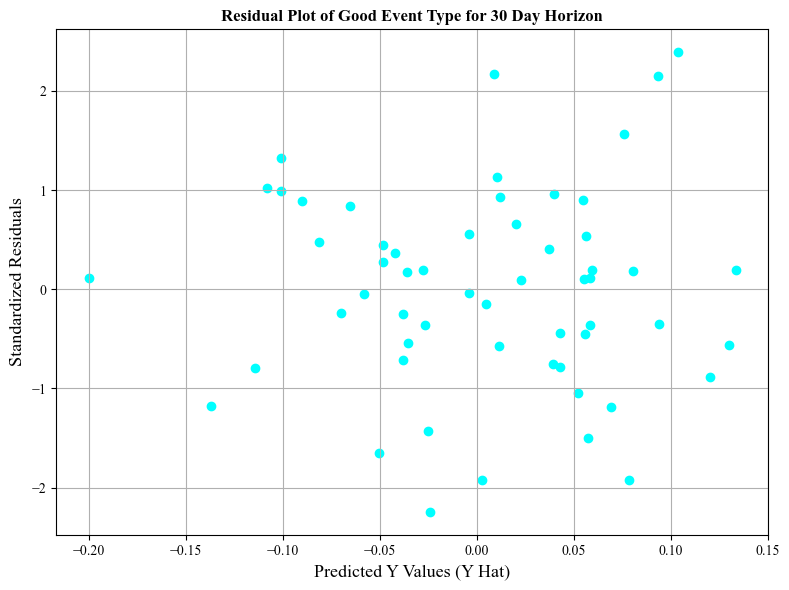

In [286]:
# Checking Residuals for Heteroskedasticity

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

residuals = list(good_stats_dict[30]['residuals'])
y_pred = list(good_stats_dict[30]['y_pred'])

scaled_residuals = scaler.fit_transform(np.array(residuals).reshape(-1, 1))

plt.figure(figsize=(8,6))
plt.scatter(y_pred, scaled_residuals, color='aqua')
plt.title("Residual Plot of Good Event Type for 30 Day Horizon", fontweight='bold', fontsize=12)
plt.xlabel("Predicted Y Values (Y Hat)", fontsize=13)
plt.ylabel("Standardized Residuals", fontsize=13)

plt.grid(True)
plt.tight_layout()
# plt.savefig('/Users/henrycosentino/Desktop/HeteroskedasticityResidualPlot.png', transparent=True)
plt.show()

## Regressions Without All Independent Variables

In [287]:
df = master_df_dict[30]
    
earnColName = "30_earnDate_dummy"
marketColName = "30_market_return"
stockColName = "30_stock_return"
eventTypeColName = "30_event_type_(good=1, no-event=NaN)"

good_df = df[df[eventTypeColName] != 0]
good_df = good_df.copy()
x1_good = good_df[eventTypeColName].fillna(0)
x2_good = good_df[earnColName]
x3_good = good_df[marketColName]
y_good = good_df[stockColName]

X_good = sm.add_constant(pd.DataFrame({
        'event_dummy': x1_good,
        'earn_dummy': x2_good,
        'market_return': x3_good
})) 

good_model_2dependentEarn = sm.OLS(y_good, X_good[['const', 'event_dummy', 'earn_dummy']]).fit()
good_model_2dependentMarket = sm.OLS(y_good, X_good[['const', 'event_dummy', 'market_return']]).fit()
good_model_1dependent = sm.OLS(y_good, X_good[['const', 'event_dummy']]).fit()

good_model_2dependentEarn_robust_results = good_model_2dependentEarn.get_robustcov_results(cov_type='HC2')
good_model_2dependentMarket_robust_results = good_model_2dependentMarket.get_robustcov_results(cov_type='HC2')
good_model_1dependent_robust_results = good_model_1dependent.get_robustcov_results(cov_type='HC2')


reg_model_ls = [good_model_2dependentEarn, good_model_2dependentMarket, good_model_1dependent]
robust_model_ls = [good_model_2dependentEarn_robust_results, good_model_2dependentMarket_robust_results, good_model_1dependent_robust_results]

model_dict = {}
for i, (model, model_r) in enumerate(zip(reg_model_ls, robust_model_ls)):
    model_dict[i] = {
        'coefficients': model.params,
        'pvalues': model.pvalues,
        'rsquared': model.rsquared,
        'rsquared_adj': model.rsquared_adj,
        'fvalue': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs,
        'tvalues': model.tvalues,
        'std_errors': model.bse,
        'conf_int': model.conf_int(),
        'residuals': model.resid,
        'y_pred': model.fittedvalues,
        'robust_se': model.HC2_se, # MacKinnon and White’s (1985) heteroskedasticity robust standard errors
        'robust_pVal': model_r.pvalues
    }

In [288]:
# Checking out the 30 Day Horizon Good Event Type Regression with Event Dummy and Earn Dummy Variables Only

print("Regression Statistics for 30 Day Horizon with Event Dummy and Earn Dummy Variables Only".upper())
print('\n')
print('Betas:\n'.upper(), model_dict[0]['coefficients'])
print('\n')
print('Standard Errors:\n'.upper(), model_dict[0]['std_errors'])
print('\n')
print('Robust Standard Errors:\n'.upper(), model_dict[0]['robust_se'])
print('\n')
print('t-Statistics:\n'.upper(), model_dict[0]['tvalues'])
print('\n')
print('Beta P-Values:\n'.upper(), model_dict[0]['pvalues'])
print('\n')
print('Beta P-Values (robust SE):'.upper())
print('const', round(model_dict[0]['robust_pVal'][0], 6))
print('event_dummy', round(model_dict[0]['robust_pVal'][1], 6))
print('earn_dummy', round(model_dict[0]['robust_pVal'][2], 6))
print('\n')
print('F-Statistics:\n'.upper(), model_dict[0]['fvalue'])
print('\n')
print('F P-Value:\n'.upper(), model_dict[0]['f_pvalue'])
print('\n')
print('R Squared:\n'.upper(), model_dict[0]['rsquared'])
print('\n')
print('R Squared (adj.):\n'.upper(), model_dict[0]['rsquared_adj'])
print('\n')

REGRESSION STATISTICS FOR 30 DAY HORIZON WITH EVENT DUMMY AND EARN DUMMY VARIABLES ONLY


BETAS:
 const          0.018260
event_dummy   -0.087487
earn_dummy     0.029398
dtype: float64


STANDARD ERRORS:
 const          0.019561
event_dummy    0.030108
earn_dummy     0.028294
dtype: float64


ROBUST STANDARD ERRORS:
 const          0.016084
event_dummy    0.029086
earn_dummy     0.031799
dtype: float64


T-STATISTICS:
 const          0.933495
event_dummy   -2.905766
earn_dummy     1.039011
dtype: float64


BETA P-VALUES:
 const          0.354720
event_dummy    0.005302
earn_dummy     0.303430
dtype: float64


BETA P-VALUES (ROBUST SE):
const 0.261283
event_dummy 0.003989
earn_dummy 0.359352


F-STATISTICS:
 4.662767584936687


F P-VALUE:
 0.01355195838068136


R SQUARED:
 0.1472634245388884


R SQUARED (ADJ.):
 0.11568058841069917




In [289]:
# Checking out the 30 Day Horizon Good Event Type Regression with Event Dummy and Market Return Variables Only

print("Regression Statistics for 30 Day Horizon with Event Dummy and Market Return Variables Only".upper())
print('\n')
print('Betas:\n'.upper(), model_dict[1]['coefficients'].round(4))
print('\n')
print('Standard Errors:\n'.upper(), model_dict[1]['std_errors'].round(4))
print('\n')
print('Robust Standard Errors:\n'.upper(), model_dict[1]['robust_se'].round(4))
print('\n')
print('t-Statistics:\n'.upper(), model_dict[1]['tvalues'].round(4))
print('\n')
print('Beta P-Values:\n'.upper(), model_dict[1]['pvalues'].round(4))
print('\n')
print('Beta P-Values (robust SE):'.upper())
print('const', round(model_dict[1]['robust_pVal'][0], 4))
print('event_dummy', round(model_dict[1]['robust_pVal'][1], 4))
print('market_return', round(model_dict[1]['robust_pVal'][2], 4))
print('\n')
print('F-Statistics:\n'.upper(), round(model_dict[1]['fvalue'], 4))
print('\n')
print('F P-Value:\n'.upper(), round(model_dict[1]['f_pvalue'], 4))
print('\n')
print('R Squared:\n'.upper(), round(model_dict[1]['rsquared'], 4))
print('\n')
print('R Squared (adj.):\n'.upper(), round(model_dict[1]['rsquared_adj'], 4))
print('\n')

REGRESSION STATISTICS FOR 30 DAY HORIZON WITH EVENT DUMMY AND MARKET RETURN VARIABLES ONLY


BETAS:
 const            0.0199
event_dummy     -0.0900
market_return    0.9976
dtype: float64


STANDARD ERRORS:
 const            0.0145
event_dummy      0.0263
market_return    0.2335
dtype: float64


ROBUST STANDARD ERRORS:
 const            0.0143
event_dummy      0.0259
market_return    0.2026
dtype: float64


T-STATISTICS:
 const            1.3709
event_dummy     -3.4240
market_return    4.2716
dtype: float64


BETA P-VALUES:
 const            0.1761
event_dummy      0.0012
market_return    0.0001
dtype: float64


BETA P-VALUES (ROBUST SE):
const 0.1691
event_dummy 0.001
market_return 0.0


F-STATISTICS:
 14.5316


F P-VALUE:
 0.0


R SQUARED:
 0.3499


R SQUARED (ADJ.):
 0.3258




In [290]:
# Checking out the 30 Day Horizon Good Event Type Regression with Event Dummy Variable Only

print("Regression Statistics for 30 Day Horizon with Event Dummy Variable Only".upper())
print('\n')
print('Betas:\n'.upper(), model_dict[2]['coefficients'].round(4))
print('\n')
print('Standard Errors:\n'.upper(), model_dict[2]['std_errors'].round(4))
print('\n')
print('Robust Standard Errors:\n'.upper(), model_dict[2]['robust_se'].round(4))
print('\n')
print('t-Statistics:\n'.upper(), model_dict[2]['tvalues'].round(4))
print('\n')
print('Beta P-Values:\n'.upper(), model_dict[2]['pvalues'].round(4))
print('\n')
print('Beta P-Values (robust SE):'.upper())
print('const', round(model_dict[2]['robust_pVal'][0], 4))
print('event_dummy', round(model_dict[2]['robust_pVal'][1], 4))
print('\n')
print('F-Statistics:\n'.upper(), round(model_dict[2]['fvalue'], 4))
print('\n')
print('F P-Value:\n'.upper(), round(model_dict[2]['f_pvalue'], 4))
print('\n')
print('R Squared:\n'.upper(), round(model_dict[2]['rsquared'], 4))
print('\n')
print('R Squared (adj.):\n'.upper(), round(model_dict[2]['rsquared_adj'], 4))
print('\n')

REGRESSION STATISTICS FOR 30 DAY HORIZON WITH EVENT DUMMY VARIABLE ONLY


BETAS:
 const          0.0293
event_dummy   -0.0864
dtype: float64


STANDARD ERRORS:
 const          0.0164
event_dummy    0.0301
dtype: float64


ROBUST STANDARD ERRORS:
 const          0.0168
event_dummy    0.0292
dtype: float64


T-STATISTICS:
 const          1.7807
event_dummy   -2.8695
dtype: float64


BETA P-VALUES:
 const          0.0805
event_dummy    0.0058
dtype: float64


BETA P-VALUES (ROBUST SE):
const 0.0864
event_dummy 0.0046


F-STATISTICS:
 8.2341


F P-VALUE:
 0.0058


R SQUARED:
 0.1302


R SQUARED (ADJ.):
 0.1144




## Descriptive Statistics (cont'd)

In [291]:
# Descriptive statistics for the 30 day horizon (Set One)

df = master_df_dict[30]

goodEvent_horizon30_df = df[df['30_event_type_(good=1, no-event=NaN)'] != 0].copy()
badEvent_horizon30_df = df[df['30_event_type_(good=1, no-event=NaN)'] != 1].copy()

goodEvent_horizon30_df.reset_index(drop=True, inplace=True)
badEvent_horizon30_df.reset_index(drop=True, inplace=True)

goodEvent_horizon30_df['30_event_type_(good=1, no-event=NaN)'] = goodEvent_horizon30_df['30_event_type_(good=1, no-event=NaN)'].fillna(0)
badEvent_horizon30_df['30_event_type_(good=1, no-event=NaN)'] = badEvent_horizon30_df['30_event_type_(good=1, no-event=NaN)'].apply(lambda x: 1 if x == 0 else 0)

goodEvent_horizon30_df.describe()

,30_stock_return,30_market_return,30_earnDate_dummy,"30_event_type_(good=1, no-event=NaN)"
count,57.000000,57.000000,57.000000,57.000000
mean,0.003513,0.010483,0.385965,0.298246
std,0.110519,0.051953,0.491150,0.461555
min,-0.235701,-0.149063,0.000000,0.000000
25%,-0.056678,-0.010920,0.000000,0.000000
50%,-0.011259,0.018544,0.000000,0.000000
75%,0.071583,0.051620,1.000000,1.000000
max,0.302917,0.116760,1.000000,1.000000


In [292]:
# Descriptive statistics for the 30 day horizon (Set Two)

badEvent_horizon30_df.describe()

,30_stock_return,30_market_return,30_earnDate_dummy,"30_event_type_(good=1, no-event=NaN)"
count,63.000000,63.000000,63.000000,63.000000
mean,0.038087,0.016481,0.492063,0.365079
std,0.106458,0.049860,0.503953,0.485320
min,-0.188209,-0.149063,0.000000,0.000000
25%,-0.022039,-0.001252,0.000000,0.000000
50%,0.042070,0.021407,0.000000,0.000000
75%,0.097036,0.051368,1.000000,1.000000
max,0.310845,0.116760,1.000000,1.000000
